In [3]:
from datasets import load_dataset, concatenate_datasets
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Tải AG News
raw_dataset = load_dataset("emotion")

# Gộp train và test thành một tập duy nhất
dataset = concatenate_datasets([raw_dataset["train"], raw_dataset["validation"], raw_dataset["test"]])


In [5]:
df = dataset.to_pandas()

# Data Exploration

In [6]:
print(df.head())

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [7]:
df.shape

(20000, 2)

In [8]:
df["label"].shape[0]

20000

In [9]:
# How many labels are there?
length = df["label"].shape[0]
print(f"There are {length} labels in the dataset")

# How many unique labels are there?
unique_labels = df["label"].nunique()
print(f"There are {unique_labels} unique labels in the dataset")

There are 20000 labels in the dataset
There are 6 unique labels in the dataset


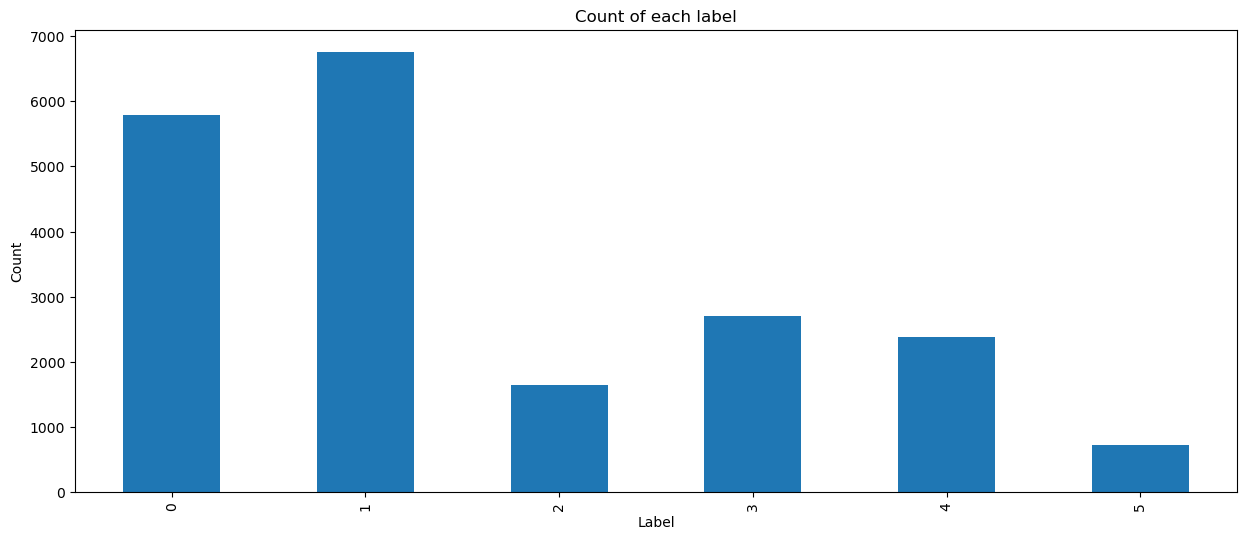

In [ ]:
# Plotting the distribution of labels
label_count = df["label"].value_counts().sort_index()
plt.figure(figsize=(15, 6))
label_count.plot(kind='bar')
plt.title("Count of each label") 
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [10]:
len(df["text"][0])

23

In [11]:
# Explore length of the text
sentences = []
for _, data in df.iterrows():
    try:
        sentences.append(len(data["text"]))
    except ValueError:
        pass

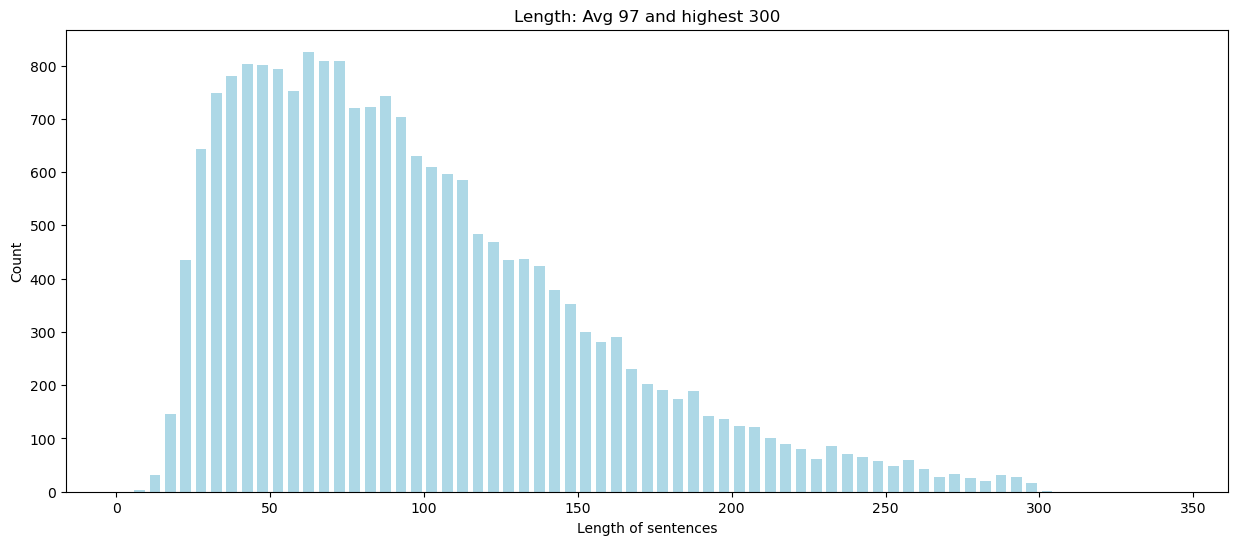

In [12]:
# Plot lengths of the sentences
plt.figure(figsize=(15, 6))
plt.title(f"Length: Avg {sum(sentences)/len(sentences):,.0f} and highest {max(sentences)}") 
plt.xlabel("Length of sentences")
plt.ylabel("Count")
plt.hist(sentences, rwidth=0.7, color="lightblue", bins=range(0, 350, 5))
plt.show()

# Data Transform

In [ ]:
from transformers import AutoTokenizer
import re # Xử lí văn bản

BASE_MODEL = 
MIN_TOKENs = 20
MAX_TOKENS = 100
MIN_CHARS = 10
CEILING_CHARS = MAX_TOKENS * 7
